<a href="https://colab.research.google.com/github/Mohamedelkebir/Hands-on-2021/blob/main/Sealer_SG%2BQR_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qrcode[pil] Pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 1.4 MB/s eta 0:00:00


In [11]:
import qrcode
from PIL import Image

def generate_qr_code(data, qr_size=100, border_size=1):
    # Fonction pour générer un QR code avec des bordures variables
    # data : les données à encoder (ici le code produit)
    # qr_size : taille finale du QR code (en pixels)
    # border_size : taille des bordures autour du QR code
    qr = qrcode.QRCode(
        version=10,  # Version du QR code (Il existe 40 versions de QR codes)
        error_correction=qrcode.constants.ERROR_CORRECT_H,  # Niveau de correction d'erreur (H = le plus élevé)
        box_size=10,  # Taille des boîtes dans le QR code (plus grand = plus gros QR code)
        border=border_size  # Taille des bordures autour du QR code (en modules, ici défini par l'utilisateur)
    )
    # Création de l'objet QR code avec les paramètres spécifiés

    qr.add_data(data)  # Ajout des données (le code produit ou autre) dans le QR code
    qr.make(fit=True)  # Optimise la taille du QR code pour qu'il soit aussi petit que possible tout en encodant les données python

    img_qr = qr.make_image(fill='black', back_color='white')  # Génère l'image QR code avec une couleur de remplissage noire et un fond blanc
    img_qr = img_qr.resize((qr_size, qr_size), Image.ANTIALIAS)  # Redimensionne le QR code à la taille spécifiée (qr_size)
    return img_qr  # Retourne l'image du QR code



<ipython-input-11-8e8d9b26cd71>:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_qr = img_qr.resize((qr_size, qr_size), Image.ANTIALIAS)  # Redimensionne le QR code à la taille spécifiée (qr_size)


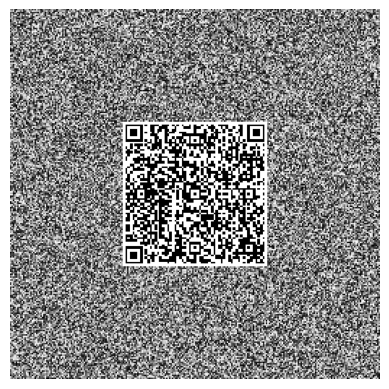

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random
import hashlib
from PIL import Image

def generate_noise_pattern_with_qr(code, salt, size=(256, 256), qr_size=100):
    # Fonction pour générer un motif de bruit aléatoire et insérer un QR code au centre.
    # code : le code produit à inclure dans le QR code
    # salt : une valeur aléatoire ajoutée pour sécuriser le hashage
    # size : taille de l'image de bruit générée (par défaut 256x256 pixels)
    # qr_size : taille du QR code en pixels (par défaut 100x100 pixels)

    # Combiner le code produit avec le salt pour rendre le hash unique
    combined_code = code + salt

    # Générer un hash SHA-256 à partir du code combiné (code produit + salt)
    # Cela donne une chaîne hexadécimale unique qui sera utilisée pour générer un motif de bruit
    hash_value = hashlib.sha256(combined_code.encode('utf-8')).hexdigest()

    # Utiliser le hash pour initialiser la graine (seed) de génération de nombres aléatoires
    # Cette graine permet de s'assurer que le bruit généré est déterministe (répétable) pour un même hash
    random.seed(int(hash_value, 16))

    # Générer un motif de bruit aléatoire de la taille spécifiée (ici 256x256 par défaut)
    # Le motif est généré avec des valeurs entre 0 et 255 (échelle de niveaux de gris)
    noise = np.random.rand(*size) * 255

    # Convertir le motif en une image PIL, avec une conversion en image en niveaux de gris ('L')
    noise_image = Image.fromarray(noise.astype('uint8')).convert('L')

    # Générer le QR code à partir du code produit (sans le salt, juste pour des informations visibles)
    # Le QR code est de la taille spécifiée (qr_size)
    img_qr = generate_qr_code("https://www.nike.com", qr_size)

    # Calculer la taille de l'image de bruit (largeur et hauteur)
    noise_width, noise_height = noise_image.size

    # Calculer la taille du QR code (largeur et hauteur)
    qr_width, qr_height = img_qr.size

    # Calculer la position où le QR code sera collé pour qu'il soit centré dans l'image de bruit
    # La position est calculée de manière à placer le QR code exactement au centre de l'image
    position = ((noise_width - qr_width) // 2, (noise_height - qr_height) // 2)

    # Coller le QR code au centre du motif de bruit aléatoire
    noise_image.paste(img_qr, position)

    # Afficher l'image finale contenant le motif de bruit et le QR code
    # Utilisation de `imshow` pour afficher l'image en échelle de gris
    plt.imshow(noise_image, cmap='gray')

    # Masquer les axes pour une meilleure visualisation de l'image
    plt.axis('off')

    # Enregistrer l'image sous le nom 'secure_graphic_with_qr.png'
    # `bbox_inches='tight'` supprime les marges autour de l'image
    # `pad_inches=0` supprime tout espacement supplémentaire autour de l'image
    plt.savefig("secure_graphic_with_qr.png", bbox_inches='tight', pad_inches=0)

    # Afficher l'image dans la fenêtre de sortie
    plt.show()

# Exemple d'utilisation de la fonction

# Définir un code produit, par exemple '010201001'
code_produit = "010201001"

# Générer un salt aléatoire de 16 caractères pour sécuriser le processus
salt = ''.join(random.choices('abcdefghijklmnopqrstuvwxyz0123456789', k=16))

# Appeler la fonction pour générer un motif de bruit sécurisé avec le QR code au centre
generate_noise_pattern_with_qr(code_produit, salt)
